In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df=pd.read_csv('cal_housing_clean.csv')

In [3]:
df.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [4]:
df.describe()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.corr()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
housingMedianAge,1.000000,-0.361262,-0.320485,-0.296244,-0.302916,-0.119034,0.105623
totalRooms,-0.361262,1.000000,0.929893,0.857126,0.918484,0.198050,0.134153
totalBedrooms,-0.320485,0.929893,1.000000,0.878026,0.979829,-0.008093,0.050594
population,-0.296244,0.857126,0.878026,1.000000,0.907222,0.004834,-0.024650
households,-0.302916,0.918484,0.979829,0.907222,1.000000,0.013033,0.065843
medianIncome,-0.119034,0.198050,-0.008093,0.004834,0.013033,1.000000,0.688075
medianHouseValue,0.105623,0.134153,0.050594,-0.024650,0.065843,0.688075,1.000000


In [9]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline

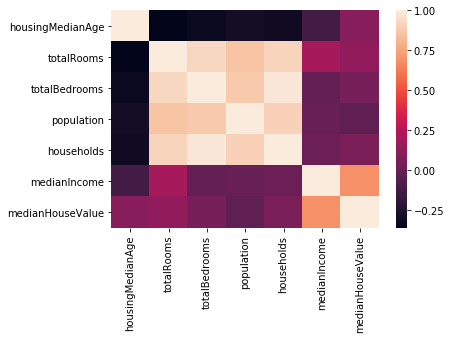

In [10]:
sns.heatmap(df.corr())

In [8]:
df.columns

Index(['housingMedianAge', 'totalRooms', 'totalBedrooms', 'population',
       'households', 'medianIncome', 'medianHouseValue'],
      dtype='object')

In [21]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [51]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: medianHouseValue, dtype: float64

In [52]:
s=MinMaxScaler()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

In [72]:
y_train.head()

,level_0,medianHouseValue
0,0,47500.0
1,1,100000.0
2,2,285800.0
3,3,175000.0
4,4,59200.0


In [58]:
X_test=pd.DataFrame(X_test,columns=['housingMedianAge', 'totalRooms', 'totalBedrooms', 'population',
       'households', 'medianIncome'])
X_train=pd.DataFrame(X_train,columns=['housingMedianAge', 'totalRooms', 'totalBedrooms', 'population',
       'households', 'medianIncome'])
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

In [70]:
y_test.reset_index(inplace=True)
y_train.reset_index(inplace=True)
y_test.drop("index",axis=1,inplace=True)
y_train.drop("index",axis=1,inplace=True)

In [40]:
hma=tf.feature_column.numeric_column('housingMedianAge')
tr=tf.feature_column.numeric_column('totalRooms')
tb=tf.feature_column.numeric_column("totalBedrooms")
pop=tf.feature_column.numeric_column("population")
house=tf.feature_column.numeric_column('households')
income=tf.feature_column.numeric_column('medianIncome')

In [41]:
feat_cols=[hma,tr,tb,pop,house,income]

In [92]:
model=tf.estimator.DNNRegressor(feature_columns=feat_cols,hidden_units=[10,10,10])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\rijhwani\\AppData\\Local\\Temp\\tmp1f_e6qbo', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000027081269F28>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [81]:
y_train.head()

,medianHouseValue
0,47500.0
1,100000.0
2,285800.0
3,175000.0
4,59200.0


In [83]:
y_test=y_test.drop("level_0",axis=1)

In [84]:
y_test.head()

,medianHouseValue
0,136900.0
1,241300.0
2,200700.0
3,72500.0
4,460000.0


In [94]:
inp_func=tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=8,num_epochs=1000,shuffle=True)

In [95]:
model.train(input_fn=inp_func,steps=25000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\rijhwani\AppData\Local\Temp\tmp1f_e6qbo\model.ckpt-25000
INFO:tensorflow:Saving checkpoints for 25001 into C:\Users\rijhwani\AppData\Local\Temp\tmp1f_e6qbo\model.ckpt.
INFO:tensorflow:loss = 7.37666e+10, step = 25001
INFO:tensorflow:global_step/sec: 483.606
INFO:tensorflow:loss = 3.34437e+10, step = 25101 (0.207 sec)
INFO:tensorflow:global_step/sec: 639.342
INFO:tensorflow:loss = 6.84376e+10, step = 25201 (0.156 sec)
INFO:tensorflow:global_step/sec: 651.857
INFO:tensorflow:loss = 7.09825e+10, step = 25301 (0.153 sec)
INFO:tensorflow:global_step/sec: 669.352
INFO:tensorflow:loss = 3.3573e+10, step = 25401 (0.149 sec)
INFO:tensorflow:global_step/sec: 660.493
INFO:tensorflow:loss = 3.48295e+10, step = 25501 (0.151 sec)
INFO:tensorflow:global_step/sec: 664.891
INFO:tensorflow:loss = 6.84102e+10, step = 25601 (0.151 sec)
INFO:tensorflow:global_step/sec: 656.143
INFO:tensorflow:loss = 8.34386e+10, 

INFO:tensorflow:loss = 3.09857e+10, step = 32801 (0.161 sec)
INFO:tensorflow:global_step/sec: 435.521
INFO:tensorflow:loss = 1.88831e+10, step = 32901 (0.232 sec)
INFO:tensorflow:global_step/sec: 527.692
INFO:tensorflow:loss = 2.23255e+10, step = 33001 (0.181 sec)
INFO:tensorflow:global_step/sec: 673.877
INFO:tensorflow:loss = 9.81043e+10, step = 33101 (0.148 sec)
INFO:tensorflow:global_step/sec: 673.878
INFO:tensorflow:loss = 1.29456e+11, step = 33201 (0.147 sec)
INFO:tensorflow:global_step/sec: 660.492
INFO:tensorflow:loss = 5.47068e+10, step = 33301 (0.152 sec)
INFO:tensorflow:global_step/sec: 484.144
INFO:tensorflow:loss = 6.55782e+10, step = 33401 (0.210 sec)
INFO:tensorflow:global_step/sec: 566.673
INFO:tensorflow:loss = 2.32839e+10, step = 33501 (0.173 sec)
INFO:tensorflow:global_step/sec: 683.108
INFO:tensorflow:loss = 7.97609e+10, step = 33601 (0.148 sec)
INFO:tensorflow:global_step/sec: 431.748
INFO:tensorflow:loss = 2.89812e+10, step = 33701 (0.238 sec)
INFO:tensorflow:globa

INFO:tensorflow:global_step/sec: 470.445
INFO:tensorflow:loss = 1.41007e+11, step = 40901 (0.210 sec)
INFO:tensorflow:global_step/sec: 413.832
INFO:tensorflow:loss = 3.60536e+10, step = 41001 (0.241 sec)
INFO:tensorflow:global_step/sec: 424.402
INFO:tensorflow:loss = 2.51729e+10, step = 41101 (0.237 sec)
INFO:tensorflow:global_step/sec: 445.241
INFO:tensorflow:loss = 3.1526e+10, step = 41201 (0.223 sec)
INFO:tensorflow:global_step/sec: 441.299
INFO:tensorflow:loss = 5.8214e+10, step = 41301 (0.230 sec)
INFO:tensorflow:global_step/sec: 435.519
INFO:tensorflow:loss = 6.54869e+10, step = 41401 (0.230 sec)
INFO:tensorflow:global_step/sec: 453.338
INFO:tensorflow:loss = 1.61342e+10, step = 41501 (0.221 sec)
INFO:tensorflow:global_step/sec: 426.212
INFO:tensorflow:loss = 3.60104e+10, step = 41601 (0.231 sec)
INFO:tensorflow:global_step/sec: 656.153
INFO:tensorflow:loss = 3.42908e+10, step = 41701 (0.151 sec)
INFO:tensorflow:global_step/sec: 457.495
INFO:tensorflow:loss = 4.69715e+10, step = 

INFO:tensorflow:global_step/sec: 435.527
INFO:tensorflow:loss = 6.41667e+10, step = 49001 (0.223 sec)
INFO:tensorflow:global_step/sec: 443.261
INFO:tensorflow:loss = 3.20577e+10, step = 49101 (0.229 sec)
INFO:tensorflow:global_step/sec: 647.624
INFO:tensorflow:loss = 8.23174e+10, step = 49201 (0.151 sec)
INFO:tensorflow:global_step/sec: 433.625
INFO:tensorflow:loss = 1.08106e+11, step = 49301 (0.233 sec)
INFO:tensorflow:global_step/sec: 651.861
INFO:tensorflow:loss = 3.64614e+10, step = 49401 (0.149 sec)
INFO:tensorflow:global_step/sec: 664.89
INFO:tensorflow:loss = 1.92676e+10, step = 49501 (0.152 sec)
INFO:tensorflow:global_step/sec: 692.6
INFO:tensorflow:loss = 3.03507e+10, step = 49601 (0.143 sec)
INFO:tensorflow:global_step/sec: 727.981
INFO:tensorflow:loss = 2.72911e+10, step = 49701 (0.137 sec)
INFO:tensorflow:global_step/sec: 639.324
INFO:tensorflow:loss = 2.66352e+10, step = 49801 (0.155 sec)
INFO:tensorflow:global_step/sec: 493.733
INFO:tensorflow:loss = 5.31491e+10, step = 4

In [96]:
eval_func=tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=8,num_epochs=1,shuffle=False)

In [97]:
model.evaluate(input_fn=eval_func,steps=25000)

INFO:tensorflow:Starting evaluation at 2018-01-25-17:11:47
INFO:tensorflow:Restoring parameters from C:\Users\rijhwani\AppData\Local\Temp\tmp1f_e6qbo\model.ckpt-50000
INFO:tensorflow:Evaluation [1/25000]
INFO:tensorflow:Evaluation [2/25000]
INFO:tensorflow:Evaluation [3/25000]
INFO:tensorflow:Evaluation [4/25000]
INFO:tensorflow:Evaluation [5/25000]
INFO:tensorflow:Evaluation [6/25000]
INFO:tensorflow:Evaluation [7/25000]
INFO:tensorflow:Evaluation [8/25000]
INFO:tensorflow:Evaluation [9/25000]
INFO:tensorflow:Evaluation [10/25000]
INFO:tensorflow:Evaluation [11/25000]
INFO:tensorflow:Evaluation [12/25000]
INFO:tensorflow:Evaluation [13/25000]
INFO:tensorflow:Evaluation [14/25000]
INFO:tensorflow:Evaluation [15/25000]
INFO:tensorflow:Evaluation [16/25000]
INFO:tensorflow:Evaluation [17/25000]
INFO:tensorflow:Evaluation [18/25000]
INFO:tensorflow:Evaluation [19/25000]
INFO:tensorflow:Evaluation [20/25000]
INFO:tensorflow:Evaluation [21/25000]
INFO:tensorflow:Evaluation [22/25000]
INFO:t

INFO:tensorflow:Evaluation [210/25000]
INFO:tensorflow:Evaluation [211/25000]
INFO:tensorflow:Evaluation [212/25000]
INFO:tensorflow:Evaluation [213/25000]
INFO:tensorflow:Evaluation [214/25000]
INFO:tensorflow:Evaluation [215/25000]
INFO:tensorflow:Evaluation [216/25000]
INFO:tensorflow:Evaluation [217/25000]
INFO:tensorflow:Evaluation [218/25000]
INFO:tensorflow:Evaluation [219/25000]
INFO:tensorflow:Evaluation [220/25000]
INFO:tensorflow:Evaluation [221/25000]
INFO:tensorflow:Evaluation [222/25000]
INFO:tensorflow:Evaluation [223/25000]
INFO:tensorflow:Evaluation [224/25000]
INFO:tensorflow:Evaluation [225/25000]
INFO:tensorflow:Evaluation [226/25000]
INFO:tensorflow:Evaluation [227/25000]
INFO:tensorflow:Evaluation [228/25000]
INFO:tensorflow:Evaluation [229/25000]
INFO:tensorflow:Evaluation [230/25000]
INFO:tensorflow:Evaluation [231/25000]
INFO:tensorflow:Evaluation [232/25000]
INFO:tensorflow:Evaluation [233/25000]
INFO:tensorflow:Evaluation [234/25000]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [421/25000]
INFO:tensorflow:Evaluation [422/25000]
INFO:tensorflow:Evaluation [423/25000]
INFO:tensorflow:Evaluation [424/25000]
INFO:tensorflow:Evaluation [425/25000]
INFO:tensorflow:Evaluation [426/25000]
INFO:tensorflow:Evaluation [427/25000]
INFO:tensorflow:Evaluation [428/25000]
INFO:tensorflow:Evaluation [429/25000]
INFO:tensorflow:Evaluation [430/25000]
INFO:tensorflow:Evaluation [431/25000]
INFO:tensorflow:Evaluation [432/25000]
INFO:tensorflow:Evaluation [433/25000]
INFO:tensorflow:Evaluation [434/25000]
INFO:tensorflow:Evaluation [435/25000]
INFO:tensorflow:Evaluation [436/25000]
INFO:tensorflow:Evaluation [437/25000]
INFO:tensorflow:Evaluation [438/25000]
INFO:tensorflow:Evaluation [439/25000]
INFO:tensorflow:Evaluation [440/25000]
INFO:tensorflow:Evaluation [441/25000]
INFO:tensorflow:Evaluation [442/25000]
INFO:tensorflow:Evaluation [443/25000]
INFO:tensorflow:Evaluation [444/25000]
INFO:tensorflow:Evaluation [445/25000]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [631/25000]
INFO:tensorflow:Evaluation [632/25000]
INFO:tensorflow:Evaluation [633/25000]
INFO:tensorflow:Evaluation [634/25000]
INFO:tensorflow:Evaluation [635/25000]
INFO:tensorflow:Evaluation [636/25000]
INFO:tensorflow:Evaluation [637/25000]
INFO:tensorflow:Evaluation [638/25000]
INFO:tensorflow:Evaluation [639/25000]
INFO:tensorflow:Evaluation [640/25000]
INFO:tensorflow:Evaluation [641/25000]
INFO:tensorflow:Evaluation [642/25000]
INFO:tensorflow:Evaluation [643/25000]
INFO:tensorflow:Evaluation [644/25000]
INFO:tensorflow:Evaluation [645/25000]
INFO:tensorflow:Evaluation [646/25000]
INFO:tensorflow:Evaluation [647/25000]
INFO:tensorflow:Evaluation [648/25000]
INFO:tensorflow:Evaluation [649/25000]
INFO:tensorflow:Evaluation [650/25000]
INFO:tensorflow:Evaluation [651/25000]
INFO:tensorflow:Evaluation [652/25000]
INFO:tensorflow:Evaluation [653/25000]
INFO:tensorflow:Evaluation [654/25000]
INFO:tensorflow:Evaluation [655/25000]
INFO:tensorflow:Evaluatio

{'average_loss': 6.6175949e+09, 'global_step': 50000, 'loss': 5.2940759e+10}

In [98]:
predict_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [101]:
preds=list(model.predict(input_fn=predict_input_func))

INFO:tensorflow:Restoring parameters from C:\Users\rijhwani\AppData\Local\Temp\tmp1f_e6qbo\model.ckpt-50000


In [102]:
p=[]
for i in preds:
    p.append(i['predictions'])

In [105]:
mean_squared_error(y_true=y_test,y_pred=p)**0.5

81348.621344585248